In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [41]:
def func(x):
    return math.cos(x)+math.sin(x)


def euler_func(h, y, x):
    
    def diff_eq(x, y):
        return 1/(math.cos(x)) - y*math.tan(x)
    
    return h*diff_eq(x, y)+y

In [64]:
start, end = 0, 1
n = int(input('Введите число шагов: '))
h=(end-start)/n

Введите число шагов: 100


In [96]:
x = np.zeros(n+1)
yo = np.zeros(n+1)
y = np.zeros(n+1)
Δi = np.zeros(n+1)
Δ = np.zeros(n+1)

x[0] = start
yo[0] = func(start)
y[0] = yo[0]

for i in range(1, n+1):
    x[i] = x[i-1] + h
    yo[i] = func(x[i])
    y[i] = euler_func(h, y[i-1], x[i-1]) 
    Δi[i] = abs(yo[i] - y[i])
    Δ[i] = Δ[i-1] + Δi[i]

In [97]:
df = pd.DataFrame({
    'x': x,
    'y°': yo,
    'y': y,
    'Δi': Δi,
    'Δ': Δ
})

In [98]:
df.head()

,x,y°,y,Δi,Δ
0,0.00,1.000000,1.000000,0.000000,0.000000
1,0.01,1.009950,1.010000,0.000050,0.000050
2,0.02,1.019799,1.019899,0.000101,0.000151
3,0.03,1.029546,1.029697,0.000152,0.000303
4,0.04,1.039189,1.039393,0.000204,0.000506


In [99]:
df.to_excel('result.xlsx')

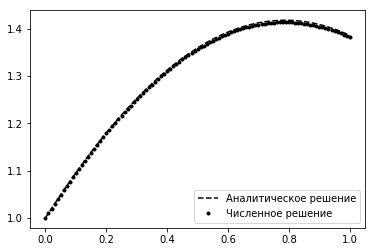

In [107]:
plt.plot(x, y, "k--")
plt.plot(x, yo, "k.") 
plt.legend(['Аналитическое решение', 'Численное решение'])
plt.show()

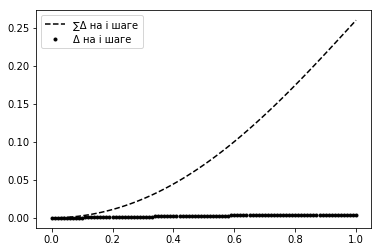

In [108]:
plt.plot(x, Δ, "k--")
plt.plot(x, Δi, "k.") 
plt.legend(['∑Δ на i шаге', 'Δ на i шаге'])
plt.show()